In [46]:
import pandas as pd
from sklearn import datasets
import numpy as np
import seaborn as sns


In [3]:
iris=datasets.load_iris()

In [11]:
data=pd.DataFrame(iris.data,columns=iris.feature_names)

data["target"]=iris.target

data


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [13]:
data["name_t"]=data["target"].map({0:"setosa",1:"versicolor",2:"virginica"})

# Separar el dataset de una forma rara

In [17]:
from sklearn.model_selection import train_test_split

target=["target","name_t"]
desc=list(set(list(data.columns))-set(target))
data[desc]

,petal width (cm),petal length (cm),sepal length (cm),sepal width (cm)
0,0.2,1.4,5.1,3.5
1,0.2,1.4,4.9,3.0
2,0.2,1.3,4.7,3.2
3,0.2,1.5,4.6,3.1
4,0.2,1.4,5.0,3.6
...,...,...,...,...
145,2.3,5.2,6.7,3.0
146,1.9,5.0,6.3,2.5
147,2.0,5.2,6.5,3.0
148,2.3,5.4,6.2,3.4


Una forma mas eficiente

In [29]:
X=data.iloc[:,:4].values
y=data["target"].values

Separar los datos de entrenamiento y prueba

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=40)

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
reg_1=DecisionTreeClassifier(max_depth=4)
reg_1.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=4)

In [41]:
predic_test=reg_1.predict(X_test)
predict_train=reg_1.predict(X_train)

In [42]:
from sklearn.metrics import classification_report,confusion_matrix

In [44]:
print(classification_report(y_test,predic_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



array([[1.        , 0.        , 0.        ],
       [0.        , 0.94444444, 0.07692308],
       [0.        , 0.05555556, 0.92307692]])

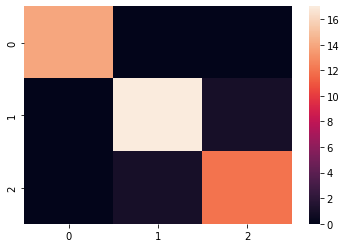

In [53]:
cnf_matrix=confusion_matrix(y_test,predic_test)
cnf_matrix/sum(cnf_matrix)
sns.heatmap(pd.DataFrame(cnf_matrix))